In [1]:
import pandas as pd
import numpy as np

data_P1=pd.read_hdf('zwei_populationen.h5', key='P_1')
data_P0=pd.read_hdf('zwei_populationen.h5', key='P_0_10000')

mu_P1=np.array([sum(data_P1["x"])/len(data_P1["x"]),sum(data_P1["y"])/len(data_P1["y"])])
mu_P0=np.array([sum(data_P0["x"])/len(data_P0["x"]),sum(data_P0["y"])/len(data_P0["y"])])

print("Mittelwert Population 1:",mu_P1)
print("Mittelwert Population 0:",mu_P0)

Mittelwert Population 1: [5.98644821 3.0852829 ]
Mittelwert Population 0: [-0.02743075  2.97994465]


In [2]:
A=0
B=0
AB=0
for i in range(len(data_P1)):
    a=data_P1["x"][i]-mu_P1[0]
    b=data_P1["y"][i]-mu_P1[1]
    A+=a**2
    B+=b**2
    AB+=a*b
V_1=np.array([[A, AB],[AB,B]])
print("V_1=",V_1)

V_1= [[123509.50150375  74100.15067029]
 [ 74100.15067029  54767.67294376]]


In [3]:
A=0
B=0
AB=0
for i in range(len(data_P0)):
    a=data_P0["x"][i]-mu_P0[0]
    b=data_P0["y"][i]-mu_P0[1]
    A+=a**2
    B+=b**2
    AB+=a*b
V_0=np.array([[A, AB],[AB,B]])
print("V_0=",V_0)

V_0= [[122077.07724786  81575.93999733]
 [ 81575.93999733  67221.90981343]]


In [4]:
V_0_1=V_0+V_1
print("V_0_1=",V_0_1)

V_0_1= [[245586.57875161 155676.09066762]
 [155676.09066762 121989.58275719]]


In [5]:
kov_inv=np.linalg.inv(V_0_1)
L=np.dot(kov_inv,(mu_P0-mu_P1))
L_norm=L/np.sqrt((L[0])**2+(L[1])**2)
print("Einheitsvektor Lambda:",L_norm)

Einheitsvektor Lambda: [-0.61886608  0.78549652]


In [6]:
P_0_proj=[]
for i in range(len(data_P0)):
    d=np.array([data_P0["x"][i],data_P0["y"][i]])
    tmp=np.dot(d,L_norm)*L_norm
    if tmp[1]<0:
        P_0_proj.append(np.linalg.norm(tmp))
    else:
        P_0_proj.append(-np.linalg.norm(tmp))
P_0_proj=np.asarray(P_0_proj)

In [7]:
P_1_proj=[]
for i in range(len(data_P1)):
    d=np.array([data_P1["x"][i],data_P1["y"][i]])
    tmp=np.dot(d,L_norm)*L_norm
    if tmp[1]<0:
        P_1_proj.append(np.linalg.norm(tmp))
    else:
        P_1_proj.append(-np.linalg.norm(tmp)) 
P_1_proj=np.asarray(P_1_proj)

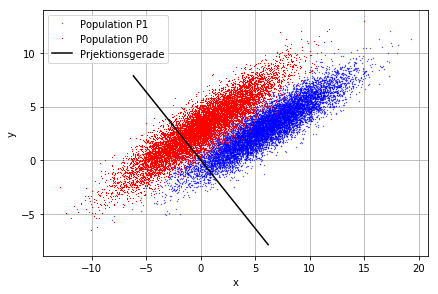

In [14]:
import matplotlib.pyplot as plt
plt.plot(data_P1["x"],data_P1["y"],"b.",label="Population P1",ms=0.6)
plt.plot(data_P0["x"],data_P0["y"],"rx",label="Population P0",ms=0.6)
plt.plot([-10*L_norm[0],10*L_norm[0]],[-10*L_norm[1],10*L_norm[1]],"k-",label="Prjektionsgerade")
plt.legend()
plt.tight_layout()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

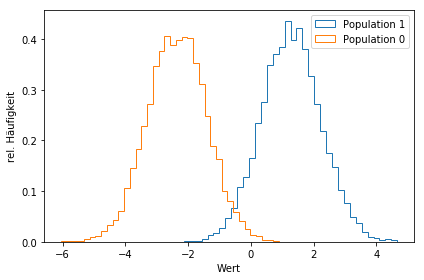

In [9]:
plt.hist(P_1_proj,bins=40,density="true",label="Population 1",histtype="step")
plt.hist(P_0_proj,bins=40,density="true",label="Population 0",histtype="step")
plt.ylabel("rel. Häufigkeit")
plt.xlabel("Wert")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
def E_R0(L_cut):#P0 Signal
    if (len(P_0_proj[L_cut>P_0_proj])+len(P_1_proj[L_cut<P_1_proj]))==0:
        return print("cut-Paramter außerhalb des Bereiches")
    else:
        return len(P_0_proj[L_cut>P_0_proj])/len(P_0_proj),len(P_0_proj[L_cut>P_0_proj])/(len(P_0_proj[L_cut>P_0_proj])+len(P_1_proj[L_cut>P_1_proj]))
def E_R1(L_cut):#P1 Signal
    if (len(P_1_proj[L_cut<P_1_proj])+len(P_0_proj[L_cut<P_0_proj]))==0:
        return print("cut-Paramter außerhalb des Bereiches")
    else:
        return len(P_1_proj[L_cut<P_1_proj])/len(P_1_proj),len(P_1_proj[L_cut<P_1_proj])/(len(P_1_proj[L_cut<P_1_proj])+len(P_0_proj[L_cut<P_0_proj]))
def S_B0(L_cut):#P0 Signal
    if len(P_1_proj[L_cut>P_1_proj])==0:
        return 0
    else:
        return len(P_0_proj[L_cut>P_0_proj])/len(P_1_proj[L_cut>P_1_proj])
def S0(L_cut):#P0 Signal
    if len(P_1_proj[L_cut>P_1_proj])+len(P_0_proj[L_cut>P_0_proj])==0:
        return 0
    else:
        return len(P_0_proj[L_cut>P_0_proj])/np.sqrt(len(P_1_proj[L_cut>P_1_proj])+len(P_0_proj[L_cut>P_0_proj]))

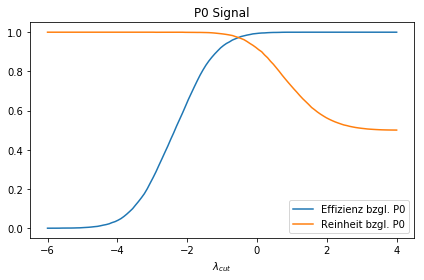

In [11]:
E_R0_data=[]
for i in np.linspace(-6,4,120):
    E_R0_data.append(E_R0(i))
plt.title("P0 Signal")
plt.plot(np.linspace(-6,4,120),[i[0] for i in E_R0_data],label="Effizienz bzgl. P0")
plt.plot(np.linspace(-6,4,120),[i[1] for i in E_R0_data],label="Reinheit bzgl. P0")
plt.legend()
plt.xlabel("$\lambda_{cut}$")
plt.tight_layout()
plt.show()

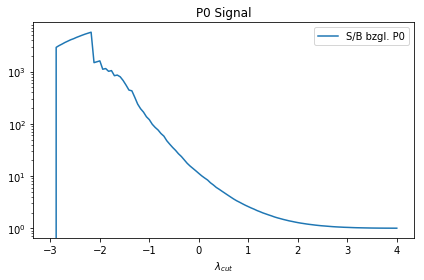

S/B max. bei lambda_{cut}= -2.1764705882352944


In [12]:
S_B0_data=[]
for i in np.linspace(-3,4,120):
    S_B0_data.append(S_B0(i))
plt.title("P0 Signal")
plt.plot(np.linspace(-3,4,120),S_B0_data,label="S/B bzgl. P0")
plt.yscale("log")
plt.legend()
plt.xlabel("$\lambda_{cut}$")
plt.tight_layout()
plt.show()
L_max=(max([(v,i) for i,v in enumerate(S_B0_data)]))
print("S/B max. bei lambda_{cut}=",np.linspace(-3,4,120)[L_max[1]])

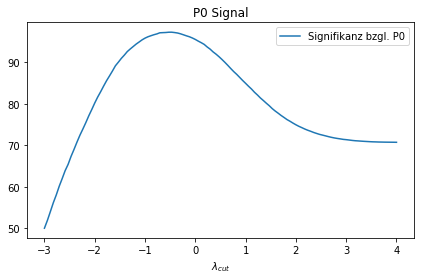

Signifikanz max. bei lambda_{cut}= -0.47058823529411775


In [13]:
S0_data=[]
for i in np.linspace(-3,4,120):
    S0_data.append(S0(i))
plt.title("P0 Signal")
plt.plot(np.linspace(-3,4,120),S0_data,label="Signifikanz bzgl. P0")
#plt.yscale("log")
plt.legend()
plt.xlabel("$\lambda_{cut}$")
plt.tight_layout()
plt.show()
L_max2=(max([(v,i) for i,v in enumerate(S0_data)]))
print("Signifikanz max. bei lambda_{cut}=",np.linspace(-3,4,120)[L_max2[1]])